In [1]:
! pip install -q git+https://github.com/tensorflow/examples.git
! pip install -q -U tfds-nightly

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow_examples.models.pix2pix import pix2pix
import tensorflow_datasets as tfds
from IPython.display import clear_output, display
import matplotlib.pyplot as plt


In [3]:
dataset, info = tfds.load('oxford_iiit_pet:4.*.*', with_info=True)

In [4]:
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/4.0.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed and
    species. Additionally, head bounding boxes are provided for the training split,
    allowing using this dataset for simple object detection tasks. In the test
    split, the bounding boxes are empty.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir='C:\\Users\\vidia\\tensorflow_datasets\\oxford_iiit_pet\\4.0.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=773.68 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'head_bbox': BBoxFeature(shape=(4,), dtype=float32),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'la

In [5]:
dataset

{'train': <_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'head_bbox': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 'test': <_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'head_bbox': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [6]:
def normalize(image, mask):
  image = tf.cast(image, tf.float32)/255.
  mask -=1
  return image, mask

@tf.function
def load_image_train(data):
  print(data)
  image = tf.image.resize(data['image'], (256,256))
  mask = tf.image.resize(data['segmentation_mask'], (256,256))

  # if tf.random.uniform(()) > 0.5:
  #   image = tf.image.flip_left_right(image)
  #   mask = tf.image.flip_left_right(mask)
  
  image, mask = normalize(image, mask)
  return image, mask

def load_image_test(data):
  image = tf.image.resize(data['image'], (128,128))
  mask = tf.image.resize(data['segmentation_mask'], (128,128))

  image, mask = normalize(image, mask)
  return image, mask

In [7]:
#training and testing length
info.splits['train'].num_examples, info.splits['test'].num_examples

(3680, 3669)

In [8]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH / BATCH_SIZE

In [9]:
#The dataset already contains the required splits of test and train, so let's continue to use the same split
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

{'file_name': <tf.Tensor 'data:0' shape=() dtype=string>, 'head_bbox': <tf.Tensor 'data_1:0' shape=(4,) dtype=float32>, 'image': <tf.Tensor 'data_2:0' shape=(None, None, 3) dtype=uint8>, 'label': <tf.Tensor 'data_3:0' shape=() dtype=int64>, 'segmentation_mask': <tf.Tensor 'data_4:0' shape=(None, None, 1) dtype=uint8>, 'species': <tf.Tensor 'data_5:0' shape=() dtype=int64>}


In [10]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [11]:
def display(display_list):
  plt.figure(figsize=(5,5))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

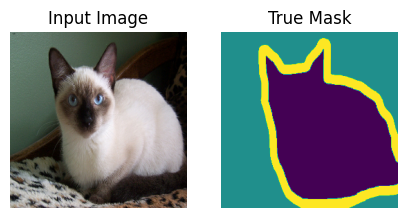

In [12]:
for image, mask in train.take(4):
  sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

In [ ]:
from data_augmentation.flip import flip_image
from data_augmentation.rotate import  rotate_image
from data_augmentation.translate import translate_images
from data_augmentation.random_crop import random_crop
from data_augmentation.color_jitter import apply_color_jitter
from data_augmentation.gaussian_noise import add_gaussian_noise
from data_augmentation.salt_pepper_noise import salt_and_pepper
from data_augmentation.box_filter import apply_box_filter

1st transformation -> Flip the image 

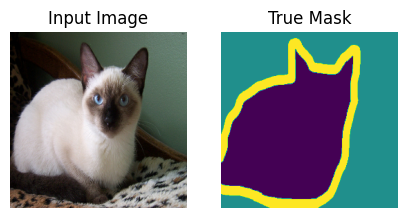

In [34]:
# Apply data augmentation (flip)
flipped_image, flipped_mask = flip_image(sample_image, sample_mask, horizontal=True, vertical=False)
# Display the flipped image and mask
display([flipped_image, flipped_mask])

2nd transformation -> Rotation with four different angles 0 , 90 , 180 , 270

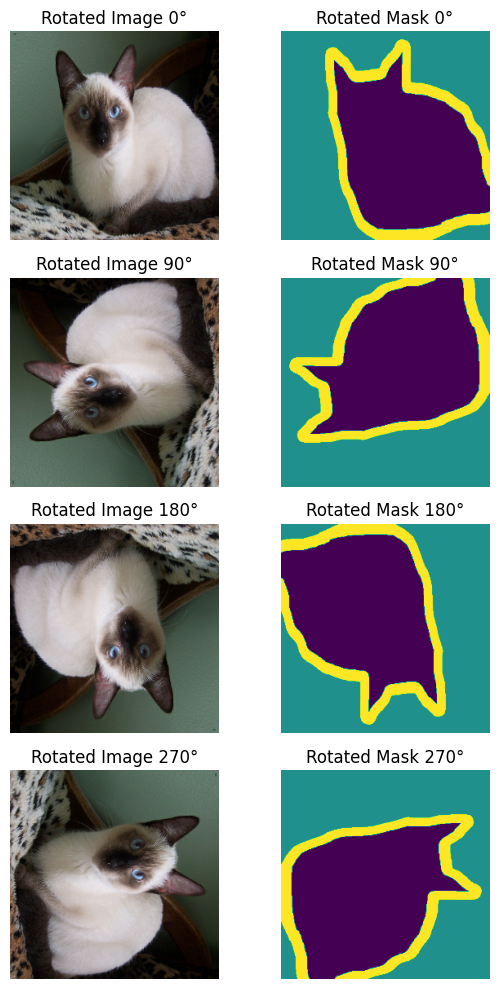

In [15]:


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Example image and mask (replace these with your actual data)
# image = np.random.rand(256, 256, 3).astype(np.float32)  # Example image
# mask = np.random.rand(256, 256, 3).astype(np.float32)   # Example mask

# # Convert the image and mask to tensors
# image_tensor = tf.convert_to_tensor(image)
# mask_tensor = tf.convert_to_tensor(mask)

# Rotate the image and mask
rotated_images, rotated_masks = rotate_image(sample_image, sample_mask)

# Display the original and rotated images
fig, axs = plt.subplots(4, 2, figsize=(6, 10))

for i in range(4):
    axs[i, 0].imshow(rotated_images[i].numpy())
    axs[i, 0].set_title(f"Rotated Image {i*90}°")
    axs[i, 0].axis("off")

    axs[i, 1].imshow(rotated_masks[i].numpy())
    axs[i, 1].set_title(f"Rotated Mask {i*90}°")
    axs[i, 1].axis("off")

plt.tight_layout()
plt.show()

3rd Tranformation -> Translate images in four directions right left top down

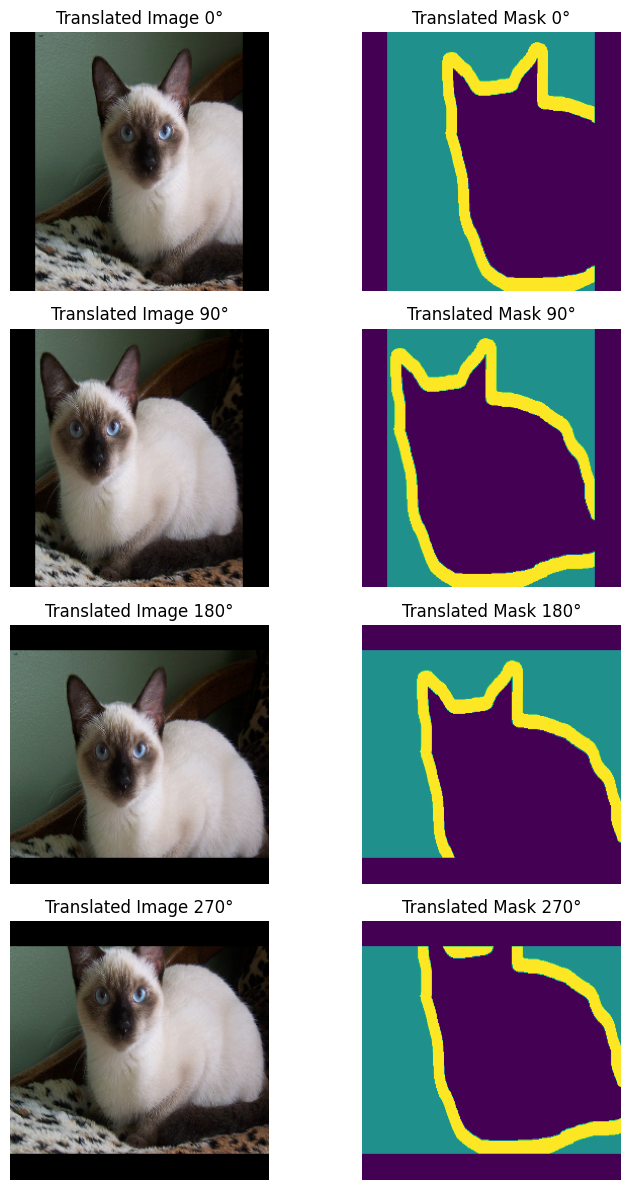

In [16]:
# Translate the image and mask
translated_images, translated_masks = translate_images(sample_image, sample_mask, IMAGE_SIZE=256)

# Plot the translated images and masks
fig, axs = plt.subplots(4, 2, figsize=(8, 12))

for i in range(4):
    axs[i, 0].imshow(translated_images[i].numpy())
    axs[i, 0].set_title(f"Translated Image {i*90}°")
    axs[i, 0].axis("off")

    axs[i, 1].imshow(translated_masks[i].numpy())
    axs[i, 1].set_title(f"Translated Mask {i*90}°")
    axs[i, 1].axis("off")

plt.tight_layout()
plt.show()

In [17]:
print(sample_image.shape)

(256, 256, 3)


4th Transformation -> Random Cropping

(224, 224, 3)


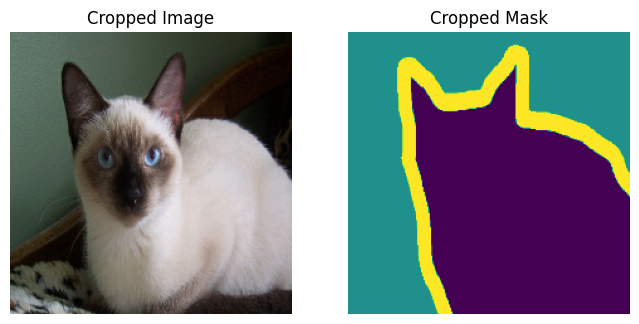

In [18]:
# Define the crop size
crop_height = 224
crop_width = 224

# Crop the image and mask
cropped_image, cropped_mask = random_crop(sample_image, sample_mask, crop_height, crop_width)
print(cropped_image.shape)
# Display the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_mask)  # Use squeeze to remove single-dimensional entries
plt.title('Cropped Mask')
plt.axis('off')

plt.show()

5th Transformation -> Color Jitter

In [19]:
jittered_images = apply_color_jitter(sample_image, brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)
print(jittered_images)


tf.Tensor(
[[[ 0.15020804  0.22801813  0.20196122]
  [ 0.14672305  0.21203803  0.18361577]
  [ 0.11850714  0.19688338  0.18997118]
  ...
  [-0.13237906 -0.13237906 -0.13237906]
  [-0.13698983 -0.13698983 -0.13698983]
  [-0.13698983 -0.13698983 -0.13698983]]

 [[ 0.10484523  0.19549838  0.17525509]
  [ 0.13897243  0.20046225  0.18113747]
  [ 0.14356865  0.23003848  0.20532297]
  ...
  [-0.13635981 -0.13635981 -0.13635981]
  [-0.13366129 -0.13366129 -0.13366129]
  [-0.13661246 -0.13661246 -0.13661246]]

 [[ 0.13136108  0.19361562  0.17141145]
  [ 0.17477918  0.23376107  0.19964068]
  [ 0.14403827  0.20455088  0.17054515]
  ...
  [-0.1388953  -0.1388953  -0.1388953 ]
  [-0.13662744 -0.13662744 -0.13662744]
  [-0.13322341 -0.13322341 -0.13322341]]

 ...

 [[ 0.36516458  0.37057224  0.3168947 ]
  [ 0.30598354  0.30925733  0.237642  ]
  [ 0.2819266   0.2883942   0.2044512 ]
  ...
  [ 0.24475408  0.20883758  0.11728969]
  [ 0.25944757  0.22093034  0.16877031]
  [ 0.2543977   0.2326293   0.160

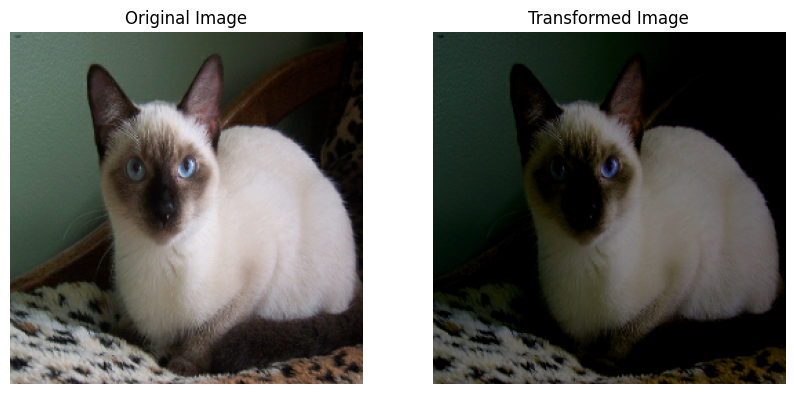

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(sample_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide axes ticks

axes[1].imshow(jittered_images)
axes[1].set_title('Transformed Image')
axes[1].axis('off')  # Hide axes ticks

plt.show()

6th Tranformation -> Gaussian Noise

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

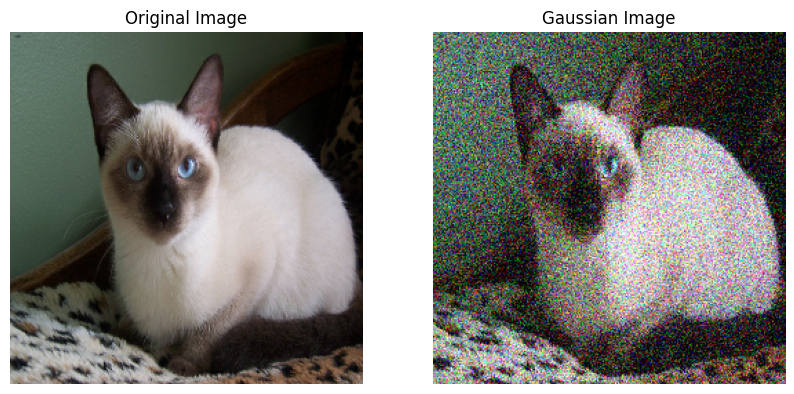

In [21]:
noisy_image = add_gaussian_noise(sample_image)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(sample_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide axes ticks

axes[1].imshow(noisy_image)
axes[1].set_title('Gaussian Image')
axes[1].axis('off')  # Hide axes ticks

7th Tranformation -> Salt and Pepper Noise

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

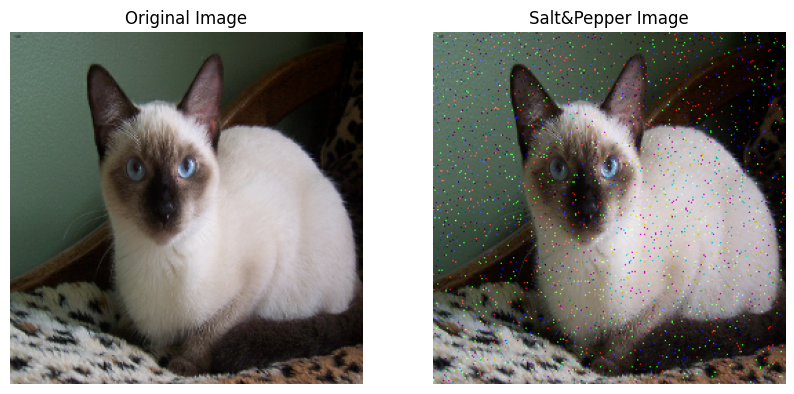

In [ ]:
noisy_salt_papper_image = salt_and_pepper(sample_image)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(sample_image)
axes[0].set_title('Original Image')
axes[0].axis('off') 

axes[1].imshow(noisy_salt_papper_image)
axes[1].set_title('Salt&Pepper Image')
axes[1].axis('off')  # 

8th -> Tranforamtion

In [ ]:
blurred_image = apply_box_filter(sample_image, kernel_size=5)
noisy_salt_papper_image = salt_and_pepper(sample_image)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(sample_image)
axes[0].set_title('Original Image')
axes[0].axis('off') 

axes[1].imshow(noisy_salt_papper_image)
axes[1].set_title('Blurred Image')
axes[1].axis('off')  